# POLYNOMIAL & PIECEWISE POLYNOMIAL INTERPOLATION
# Nội suy đa thức và nội suy đa thức từng khúc

## Nguồn gốc của nội suy đa thức

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

In [ ]:
# Linear interpolation 
x1 = np.array([[1, 10]]); y1 = np.array([[3, 21]])
x2 = np.linspace(1,10,100); y2 = 2 * x2 + 1
plt.subplot(2,1,1)
plt.plot(x1,y1, 'ok', label='Known points')
plt.plot(x2, y2, '--b', label='Linear interpolation')


# Quadratic and Cubic Interpolations
x = np.linspace(0, 2, 8)
y = 10*np.sinc(x*2+4)

xn = np.linspace(0, 2, 100)
y0 = 10*np.sinc(xn*2+4)

fq = interpolate.interp1d(x, y, kind='quadratic')
ynq = fq(xn)
fc = interpolate.interp1d(x, y, kind='cubic')
ync = fc(xn)

plt.subplot(2,1,2)
plt.plot(xn, y0, '--k', label='True values')
plt.plot(x, y, 'ok', label='Known points')
plt.plot(xn, ynq, label='Quadratic spline')
plt.plot(xn, ync, label='Cubic spline')
plt.legend()
plt.show()

## Công thức nội suy Lagrange

In [ ]:
# Built-in function in Scipy

import numpy as np
from scipy.interpolate import lagrange

# thay noi suy da thuc y(x) =  3 x^2 - 2x + 1

x = np.array([0, 1, 2, -1])
y = np.array([-0.1625, 0.5766, 1.1346, -1.1394])
y2 = 10**y
print('y2 = ',y2)

poly = lagrange(x, y2)
print(poly)

xeval = np.array([1.2])
y2eval = poly(xeval)
print(y2eval)

yeval = np.log10(y2eval)
print(yeval)


# from numpy import polyval
# p = np.array([3, -2, 1])
# p = polyval(p,0)
# print(p)

## Công thức nội suy Newton

In [ ]:
# Newton method to compute the value of the Newton polynomial, knowing c

def Newton_poly(c,x,z):
    from numpy import arange
    n = len(x)
    print(n)
    P = c[n-1]
    print(P)
    for i in arange(n-2,0,-1):
        P = P * (z - x[i]) + c[i]
        print(P)
    return P

"""
Test the Newton polynomial 
"""
import numpy as np
x = np.array([0, 1, 2])
c = np.array([1, 8, 4])
# P(x) = 1 + 2*(x-0)+4*(x-0)*(x-1) = 4x^2 + 4x + 1 = (2x+1)^2
z = np.array([3, 4])
P = Newton_poly(c,x,z)
print(P)

    
    


## Bảng tỉ sai phân

In [ ]:
import numpy as np
import copy

def div_diff(x, y):
    
    n = len(x)
    coef = y.copy()
    
    for i in range(1, n):
        coef[i:n] = (coef[i:n] - coef[i-1]) / (x[i:n] - x[i-1])        
    return coef

In [ ]:
#x = [0.0, 1.0, 2.0, -1.0]
#x = np.array(x)

#y2 = np.array([-0.1625, 0.5766, 1.1346, -1.1394])
#y = 10**y2
#y = np.array(y)

#x = np.linspace(0.1,0.5,5)
#y = np.sin(x)
#y = np.array([0.099833, 0.198669, 0.295520, 0.389418, 0.479426])

x = np.array([0,1,5])
y = np.array([1,9,25])

print('x = ',x)
print('y = ',y)

c = div_diff(x, y)
print('c = ',c)
       

## Hiện tượng Runge - Nội suy Tchebyshev

In [ ]:
import numpy as np
help(np.linspace)

## Nội suy đa thức từng khúc & Nội suy Spline

In [ ]:
from numpy import interp
help(interp)

In [ ]:
import numpy as np
import scipy as sp

# Test built-in function np.interp
x = np.array([0, 1, 2, 5])
y = np.array([2, 5, 10, 127])

xeval = np.array([3])
yeval = np.interp(xeval,x,y)
print(yeval)


In [ ]:
from scipy.interpolate import CubicSpline, CubicHermiteSpline
help(CubicSpline)


In [ ]:
from scipy.interpolate import CubicSpline, CubicHermiteSpline

# The function for interpolation is y(x) = x^3 + 2
x = np.array([0, 1, 2, 5])
y = np.array([2, 5, 10, 127])

CS = CubicSpline(x,y)

xeval = np.array([3])
yeval = CS(xeval)
print(yeval)


## Một số ứng dụng

## Nội suy Padé bằng hàm phân thức.

In [ ]:
from scipy.interpolate import pade

help(pade)

e_exp = [1.0, 1.0, 1.0/2.0, 1.0/6.0, 1.0/24.0, 1.0/120.0]
p, q = pade(e_exp, 2)

# Least square approximation

In [ ]:
import numpy as np
from numpy.linalg import solve, qr

n = 7
vector_one = np.ones(n)

T = np.array([1,2,3,4,5,6,7])

#help(np.hstack)
A = np.vstack((vector_one,T,T**2)).T

b = np.array([2.31,2.01,1.80,1.66,1.55,1.47,1.41]).T

# 1st way: Using normal equation
c = solve(A.T@A,A.T@b)
print('c = ',c)


# 2nd way: Using QR decomposition
Q, R = qr(A)
c2 = solve(R,Q.T@b)
print('c2 = ',c2)



In [ ]:
# Example 3.10 (Kiusalass)
# We find the regression model y = c0 + c1 * x + c2 * x^2

import numpy as np
from numpy.linalg import solve, qr, norm

n = 3

x = np.array([0.0, 1.0, 2.0, 2.5, 3.0])
m = np.size(x)

b = np.array([2.9, 3.7, 4.1, 4.4, 5.0])

vector_one = np.ones(m)

A = np.vstack((vector_one,x,x**2)).T
print('Ma tran A la \n',A)

# Phuong phap phuong trinh chinh tac
c = solve(A.T@A,A.T@b)
print('c = ',c)

print(type(c))

# Nhu vay CT nghiem la y ~ f(x) = c[0] + c[1] * x + c[2] * x**2

y_approx = A@c
print(y_approx)

# Tinh toan do lech chuan
S = norm(y_approx - b,2)**2
print('Gia tri toi uu cua trung binh phuong la S = ',S)
print('Do lech chuan (standard deviation) la ',np.sqrt(S/(m-n)))

In [ ]:
from numpy.linalg import qr

Q,R = qr(A)
c2 = solve(R,Q.T@b)
print('c2 = ',c2)


In [ ]:
"""
Giải bài toán bình phương tối thiểu = 2 pp: PT chính tắc và QR
"""
def least_square(A,b):
    from numpy.linalg import solve, qr, norm
    # PT chinh tac
    x = solve(A.T@A,A.T@b)
    
    # PP QR
    Q, R = qr(A)
    x2 = solve(R,Q.T@b)
    
    tol = 1e-6;
    sai_so = norm(x2-x)
    print("Sai so cua nghiem duoc tinh boi 2 phuong phap Normal equation & QR la ",sai_so)
    
    return x

In [ ]:
import numpy as np
from numpy.random import randn

A = randn(5,3)
b = randn(5,1)

x = least_square(A,b).T
print("No được tính bởi hàm ta viết là x = ",x)

x2 = np.linalg.lstsq(A,b,rcond=None)
x2 = np.array(x2)
print("No được tính bởi built-in function lstsq là x = ",x2[0].T)

In [78]:
"""
Viết hàm curve fitting tìm đường cong bậc n để fit vào tập dữ liệu x/y cho trước 
"""

def curve_fitting(x,y,n):
    import numpy as np
    m = np.size(x)
    A = np.ones(m)
    
    for i in np.arange(1,n):
        A = np.vstack((A,x**i))
    
    A = A.T
    
    p = least_square(A,y)    
    return p

# Test function curve_fitting
import numpy as np

x = np.array([0.2,0.3,0.4,0.5,0.6])
y = np.array([3.16,2.38,1.75,1.34,1.00])
#y = np.log(y)
n = 3

p = curve_fitting(x,y,n)
p = np.flip(p)
print("Vector hệ số của đa thức hồi quy là \n p = ",p)

p2 = np.polyfit(x,y,n-1)
print("Vector hệ số của đa thức hồi quy sử dung built-in function polyfit là \n p = ",p2)


Sai so cua nghiem duoc tinh boi 2 phuong phap Normal equation & QR la  5.027921473222667e-13
Vector hệ số của đa thức hồi quy là 
 p =  [  7.85714286 -11.64571429   5.17      ]
Vector hệ số của đa thức hồi quy sử dung built-in function polyfit là 
 p =  [  7.85714286 -11.64571429   5.17      ]


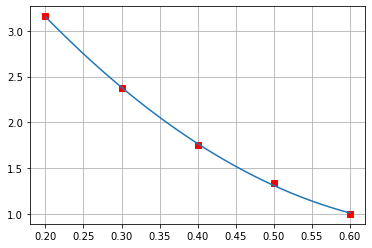

In [84]:
from numpy import polyval

import matplotlib.pyplot as plt
xp = np.linspace(0.2, 0.6, 100)
plt.plot(x, y, 'rs', xp, polyval(p,xp), '-')
#plt.plot(x, y, 'rs', xp, polyval(p,xp), '-', xp, polyval(p2,xp), '--')
plt.grid(1)
plt.show()

In [ ]:
#import numpy as np
#help(np.polyfit)
#help(np.polyval)